In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

# configs
plt.rcParams['figure.figsize'] = (20,6)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')

In [5]:
fetch_housing_data()

In [6]:
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,452600.0000,NEAR BAY
1,-122.2200,37.8600,21.0000,7099.0000,1106.0000,2401.0000,1138.0000,8.3014,358500.0000,NEAR BAY
2,-122.2400,37.8500,52.0000,1467.0000,190.0000,496.0000,177.0000,7.2574,352100.0000,NEAR BAY
3,-122.2500,37.8500,52.0000,1274.0000,235.0000,558.0000,219.0000,5.6431,341300.0000,NEAR BAY
4,-122.2500,37.8500,52.0000,1627.0000,280.0000,565.0000,259.0000,3.8462,342200.0000,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


>  total_bedrooms column is missing 207 rows of data.

In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0000,20640.0000,20640.0000,20640.0000,20433.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,-119.5697,35.6319,28.6395,2635.7631,537.8706,1425.4767,499.5397,3.8707,206855.8169
std,2.0035,2.1360,12.5856,2181.6153,421.3851,1132.4621,382.3298,1.8998,115395.6159
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,14999.0000
25%,-121.8000,33.9300,18.0000,1447.7500,296.0000,787.0000,280.0000,2.5634,119600.0000
50%,-118.4900,34.2600,29.0000,2127.0000,435.0000,1166.0000,409.0000,3.5348,179700.0000
75%,-118.0100,37.7100,37.0000,3148.0000,647.0000,1725.0000,605.0000,4.7432,264725.0000
max,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001,500001.0000


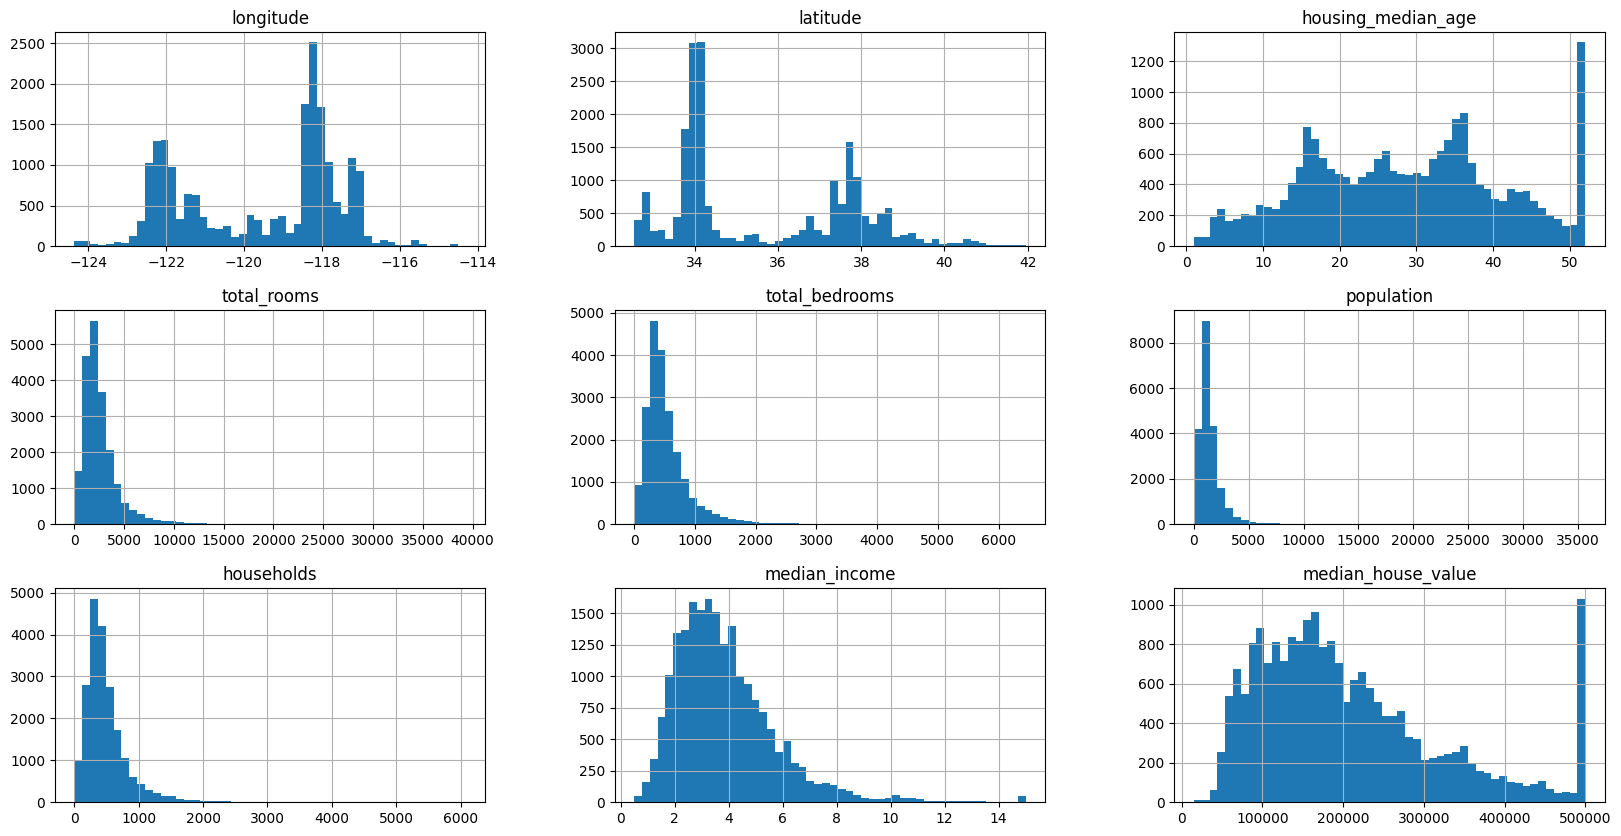

In [11]:
housing.hist(bins = 50, figsize= (20, 10))
plt.show()

### Problem with the dataset
> housing_median_age and housing_median_income columns are capped. see the last bin of the histogram. It is not a normal distribution. 

> Many histograms are tail heavy , they extend much farther to the right of the median than to the left, we need more bell shaped distributions.

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### stratified sampling
- the population is divided into homogenous subgroups (strata) and the right number of instances are sampled from each subgroups to gaurantee that the test set is representative of the overall population

- 5 income category attribute - labelled from one to 5 

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0,1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

<Axes: >

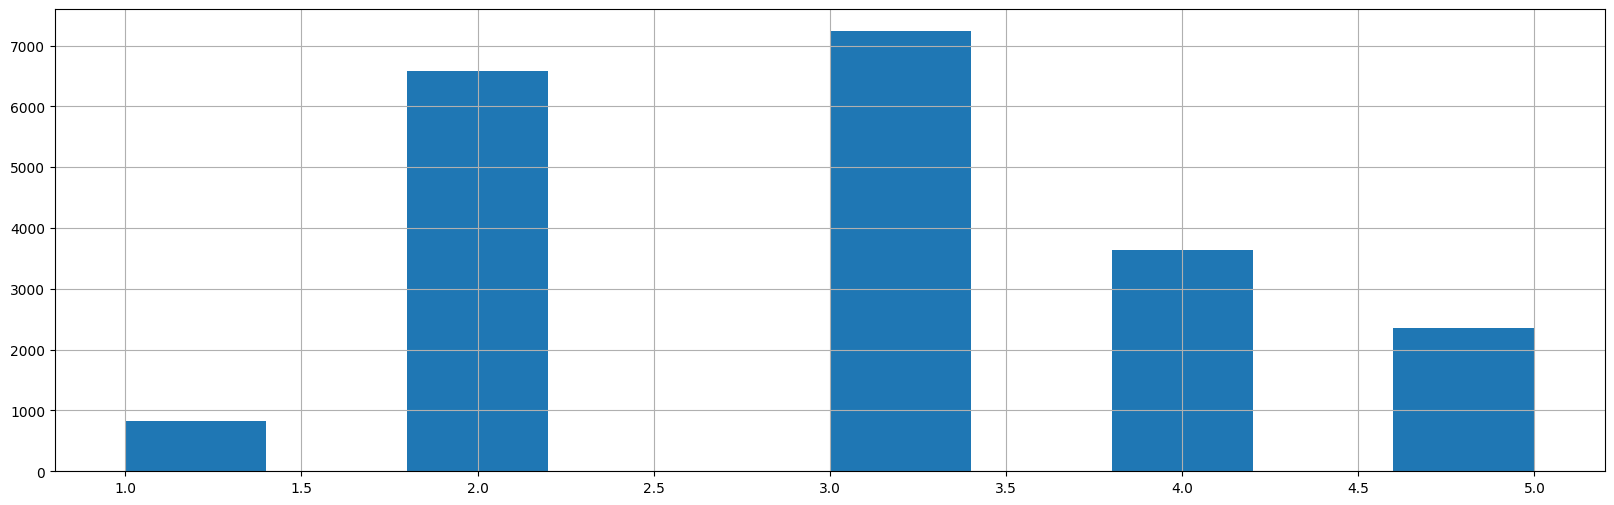

In [15]:
housing['income_cat'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3   0.3505
2   0.3188
4   0.1764
5   0.1143
1   0.0400
Name: count, dtype: float64

the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,452600.0000,NEAR BAY,5
1,-122.2200,37.8600,21.0000,7099.0000,1106.0000,2401.0000,1138.0000,8.3014,358500.0000,NEAR BAY,5
2,-122.2400,37.8500,52.0000,1467.0000,190.0000,496.0000,177.0000,7.2574,352100.0000,NEAR BAY,5
3,-122.2500,37.8500,52.0000,1274.0000,235.0000,558.0000,219.0000,5.6431,341300.0000,NEAR BAY,4
4,-122.2500,37.8500,52.0000,1627.0000,280.0000,565.0000,259.0000,3.8462,342200.0000,NEAR BAY,3


In [19]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop(columns = ['income_cat'], axis = 1, inplace = True)

In [20]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

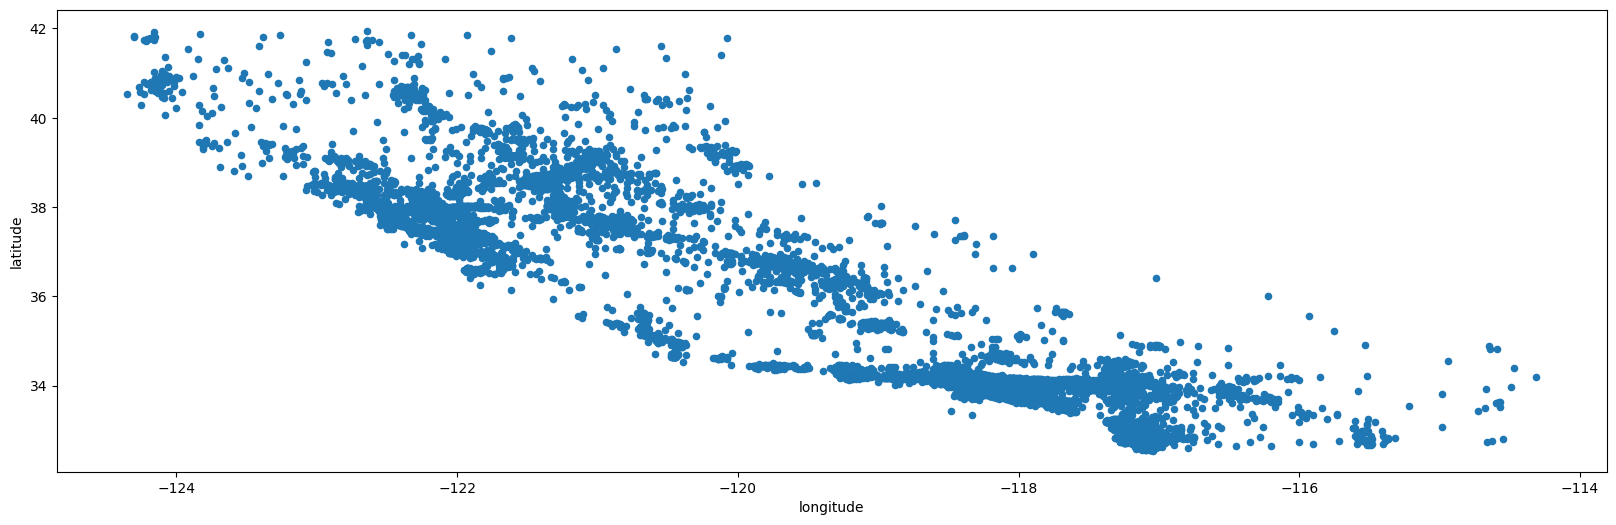

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

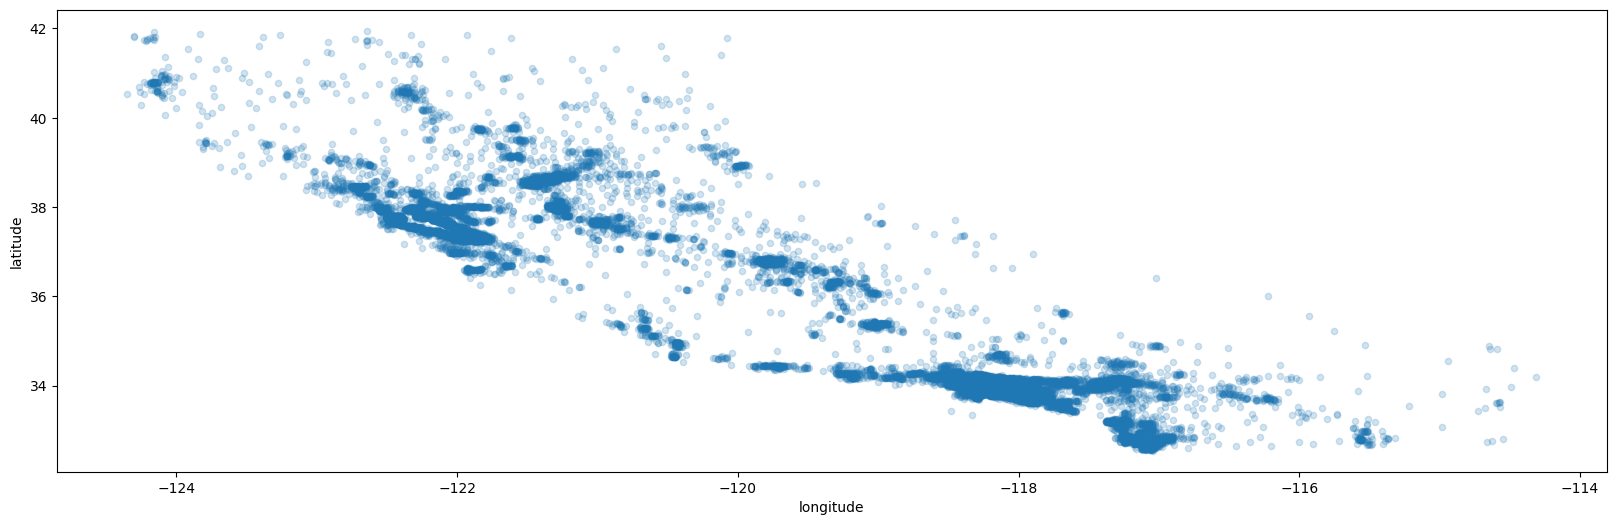

In [24]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha=0.2)

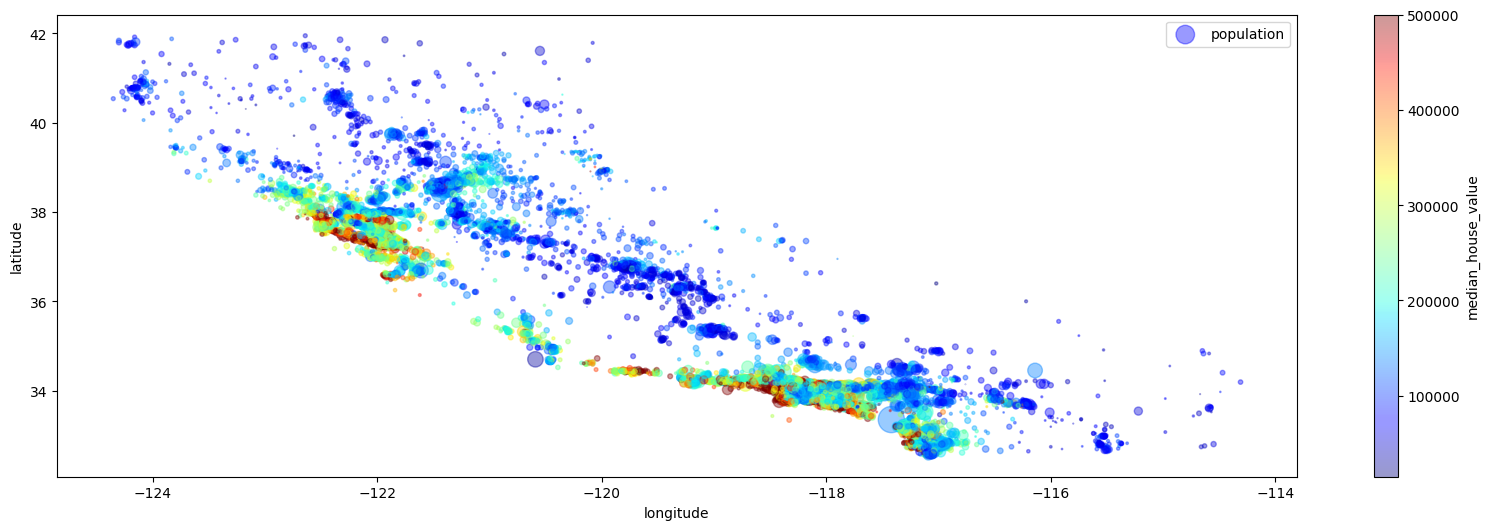

In [25]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=housing["population"]/100, label="population",
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [26]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x75de93e4f320>)

Saving figure california_housing_prices_plot


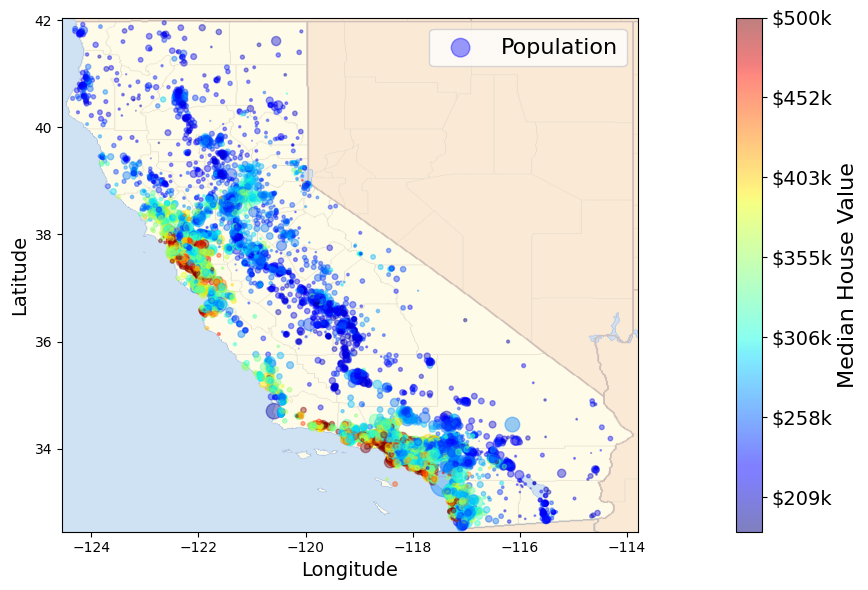

In [27]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude",
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [28]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [29]:
corr_matrix = housing.select_dtypes(include=[float]).corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.0000
median_income         0.6872
total_rooms           0.1351
housing_median_age    0.1141
households            0.0646
total_bedrooms        0.0478
population           -0.0269
longitude            -0.0475
latitude             -0.1427
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


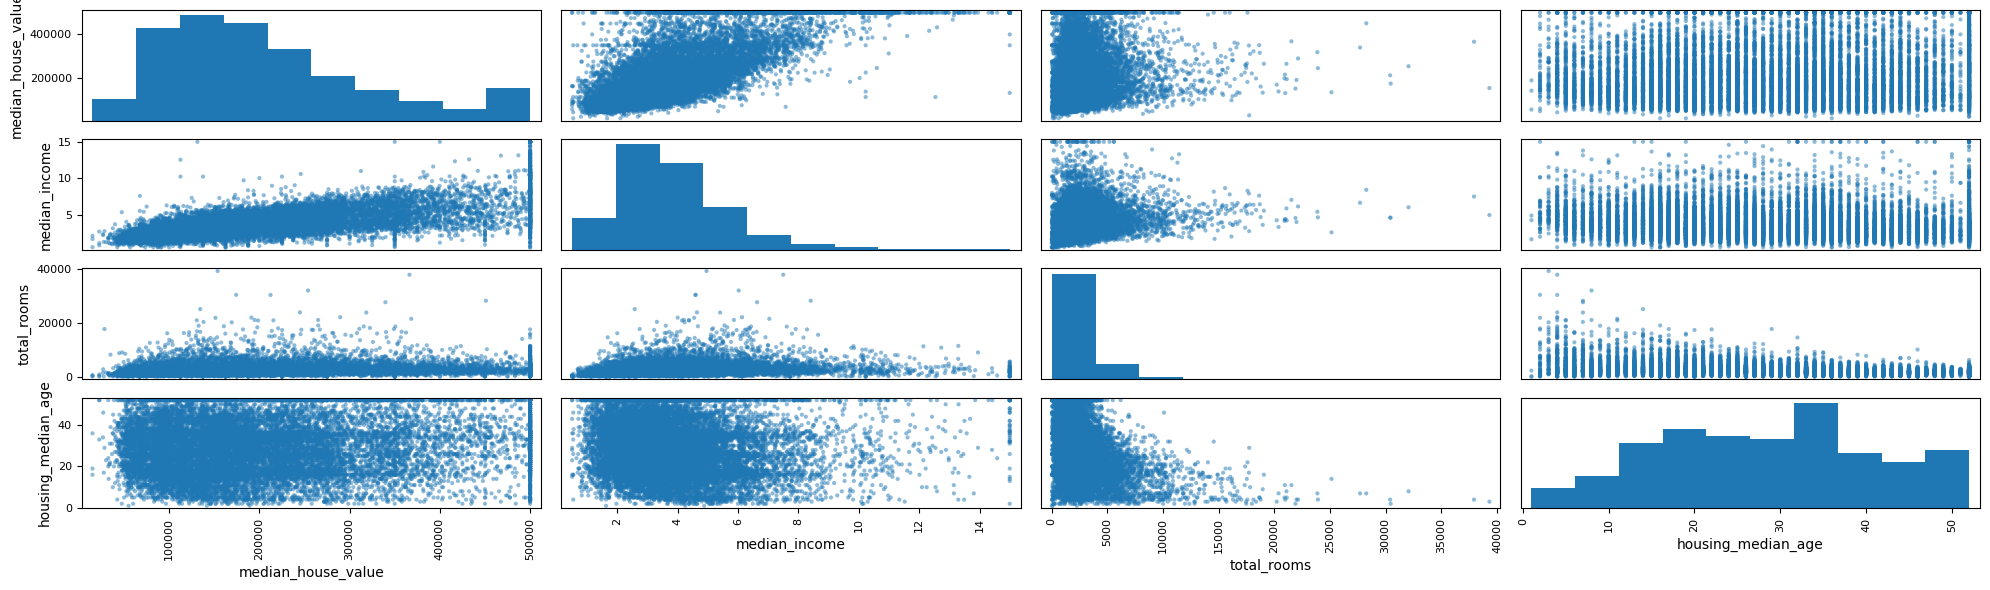

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes])
save_fig("scatter_matrix_plot")

<Axes: xlabel='median_income', ylabel='median_house_value'>

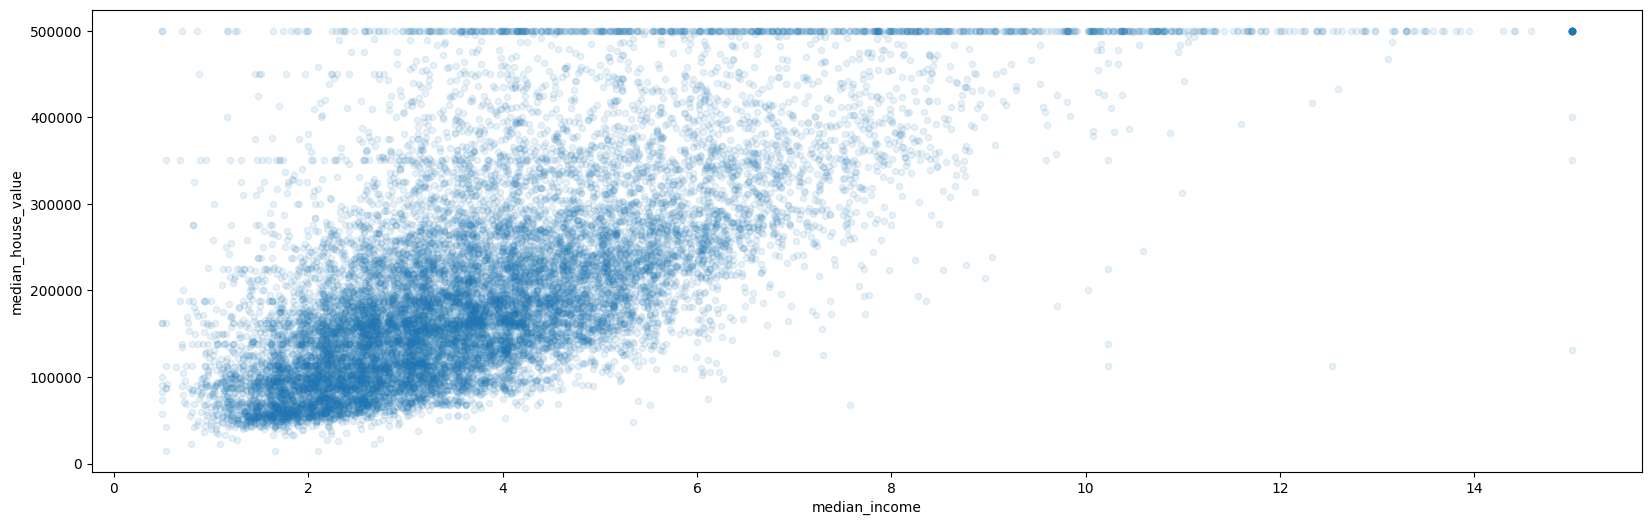

In [32]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [33]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [34]:
corr_matrix = housing.select_dtypes(include = [float]).corr()
corr_matrix['median_house_value'].sort_values(ascending  = False)

median_house_value          1.0000
median_income               0.6872
rooms_per_household         0.1463
total_rooms                 0.1351
housing_median_age          0.1141
households                  0.0646
total_bedrooms              0.0478
population_per_household   -0.0220
population                 -0.0269
longitude                  -0.0475
latitude                   -0.1427
bedrooms_per_room          -0.2600
Name: median_house_value, dtype: float64

## Preparing the data for ML algorithms

> separate the predictors and the labels

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [37]:

housing_num = housing.drop("ocean_proximity", axis=1)

In [38]:

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:

X = imputer.transform(housing_num)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Issue with ordinal encoder :
ML algo will assume that two nearby values are more similar than two distinct values.
fine for cases such as "bad", "avg", "good" and "excellent"

but it is not the case in our ocean proximity

to fix this we use one binary attribute per category - ONE-HOT encoding.

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [45]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling 

Two options : 
1. min-max scaling or normalization :
> default range (0 - 1), we can tune its hyperparameter that can change the range.
> 
> so x` = max(x)−min(x) / (x−min(x))

2. Standarization or calculating z-score : 
> z = (x - μ) / σ.
> 
> may be a problem for some neural netwrokds algo (because they expect an input value ranging from 0 to 1)
>
> much less affected by outliers.
> 


​


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

## training and evaluating on the training set 

In [49]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [50]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

## More complex model

In [52]:

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

## Better evaluation using cross-validation

In [54]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [71986.79997823 70252.88104551 68611.4232563  71334.36849238
 69131.7096422  78389.57726431 69625.8546555  72191.66502448
 69113.32575131 70089.64365945]
Mean: 71072.72487696694
Standard deviation: 2703.5007555625007


In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels ,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818062


In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [58]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18657.77808174522)

In [59]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51211.30051482 48937.38627241 46834.05597442 52067.85568445
 47713.00249821 51932.45938321 52315.48335599 49593.73432224
 48616.67030384 53606.33228958]
Mean: 50282.82805991801
Standard deviation: 2133.2185520063504
